<a href="https://colab.research.google.com/github/Wendy-syy/Projects/blob/main/LendingClub_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LendingClub Loan Prediction**

# Part 0: Setup Google Drive Environment

In [ ]:
import pandas as pd
import numpy as np

from tabulate import tabulate # used to print tabular data in nicely formatted tables

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
link = 'http://drive.google.com/open?id=1G8Zw4DooRrQg_WgHe9eEqk3GCSzZ8JVu'
fluff, id = link.split("=")
file = drive.CreateFile({'id':id})
file.GetContentFile('loan-clean-version.csv')
df = pd.read_csv('loan-clean-version.csv')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,Source Verified,car,GA,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


# Part 1: Data Exploration

##full description of each fields:

LoanStatNew	 | Description
--- | ---
zip_code	|The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state	|The state provided by the borrower in the loan application
annual_inc|	The annual income provided by the borrower during registration.
collection_recovery_fee |	post charge off collection fee
collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections
delinq_2yrs	|The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
desc |	Loan description provided by the borrower
dti	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line	|The month the borrower’s earliest reported credit line was opened
emp_length|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title|	The job title supplied by the Borrower when applying for the loan.
fico_range_high	|The upper boundary of range the borrower’s FICO belongs to.
fico_range_low|	The lower boundary of range the borrower’s FICO belongs to.
funded_amnt |	The total amount committed to that loan at that point in time.
funded_amnt_inv|	The total amount committed by investors for that loan at that point in time.
grade |	LC assigned loan grade
home_ownership|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
id |	A unique LC assigned ID for the loan listing.
initial_list_status |	The initial listing status of the loan. Possible values are – W, F
inq_last_6mths |	The number of inquiries by creditors during the past 6 months.
installment	| The monthly payment owed by the borrower if the loan originates.
int_rate |	Interest Rate on the loan
is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d	 | The month which the loan was funded
last_credit_pull_d |	The most recent month LC pulled credit for this loan
last_fico_range_high |	The last upper boundary of range the borrower’s FICO belongs to pulled.
last_fico_range_low |	The last lower boundary of range the borrower’s FICO belongs to pulled.
last_pymnt_amnt	| Last total payment amount received
last_pymnt_d |	Last month payment was received
loan_amnt |	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status |	Current status of the loan
member_id |	A unique LC assigned Id for the borrower member.
mths_since_last_delinq	| The number of months since the borrower’s last delinquency.
mths_since_last_major_derog	| Months since most recent 90-day or worse rating
mths_since_last_record |	The number of months since the last public record.
next_pymnt_d	| Next scheduled payment date
open_acc	| The number of open credit lines in the borrower’s credit file.
out_prncp |	Remaining outstanding principal for total amount funded
out_prncp_inv	| Remaining outstanding principal for portion of total amount funded by investors
policy_code |	Publicly available policy_code=1, new products not publicly available policy_code=2
pub_rec	|Number of derogatory public records
purpose	| A category provided by the borrower for the loan request.
pymnt_plan |	Indicates if a payment plan has been put in place for the loan
recoveries |	post charge off gross recovery
revol_bal |	Total credit revolving balance
revol_util|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
sub_grade |	LC assigned loan subgrade
term	| The number of payments on the loan. Values are in months and can be either 36 or 60.
title |	The loan title provided by the borrower
total_acc	| The total number of credit lines currently in the borrower’s credit file
total_pymnt	|Payments received to date for total amount funded
total_pymnt_inv |	Payments received to date for portion of total amount funded by investors
total_rec_int	| Interest received to date
total_rec_late_fee|	Late fees received to date
total_rec_prncp	| Principal received to date
url	| URL for the LC page with listing data.

# 1.1 Understand the Raw Dataset

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,Source Verified,car,GA,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

In [ ]:
df.nunique()

id                     9004
loan_amnt               604
funded_amnt             681
funded_amnt_inv        1234
term                      2
int_rate                 70
installment            3871
grade                     7
emp_length               11
home_ownership            3
annual_inc             1555
verification_status       3
purpose                  13
addr_state               45
dti                    2559
earliest_cr_line        458
inq_last_6mths            9
open_acc                 33
pub_rec                   3
revol_bal              7573
revol_util             1023
total_acc                63
out_prncp                 1
out_prncp_inv             1
total_pymnt            8962
total_pymnt_inv        8942
total_rec_prncp        2199
total_rec_int          8838
loan_status               2
dtype: int64

In [ ]:
df.isnull().sum()

id                       0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
emp_length             316
home_ownership           0
annual_inc               0
verification_status      0
purpose                  0
addr_state               0
dti                      0
earliest_cr_line         0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               3
total_acc                0
out_prncp                0
out_prncp_inv            0
total_pymnt              0
total_pymnt_inv          0
total_rec_prncp          0
total_rec_int            0
loan_status              0
dtype: int64

In [ ]:
df.loc[:,'loan_status'].value_counts()

Fully Paid     7487
Charged Off    1517
Name: loan_status, dtype: int64

# 1.2 EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
# correlation heat map of numerical features
num_col = []
for col in df:
  if df[col].dtype == np.int64 or np.float64:
    num_col.append(col)
corr = df[num_col].corr()
corr_ = corr[corr>.5]

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'loan_amnt'),
 Text(2.5, 0, 'funded_amnt'),
 Text(3.5, 0, 'funded_amnt_inv'),
 Text(4.5, 0, 'int_rate'),
 Text(5.5, 0, 'installment'),
 Text(6.5, 0, 'annual_inc'),
 Text(7.5, 0, 'dti'),
 Text(8.5, 0, 'earliest_cr_line'),
 Text(9.5, 0, 'inq_last_6mths'),
 Text(10.5, 0, 'open_acc'),
 Text(11.5, 0, 'pub_rec'),
 Text(12.5, 0, 'revol_bal'),
 Text(13.5, 0, 'revol_util'),
 Text(14.5, 0, 'total_acc'),
 Text(15.5, 0, 'out_prncp'),
 Text(16.5, 0, 'out_prncp_inv'),
 Text(17.5, 0, 'total_pymnt'),
 Text(18.5, 0, 'total_pymnt_inv'),
 Text(19.5, 0, 'total_rec_prncp'),
 Text(20.5, 0, 'total_rec_int')]

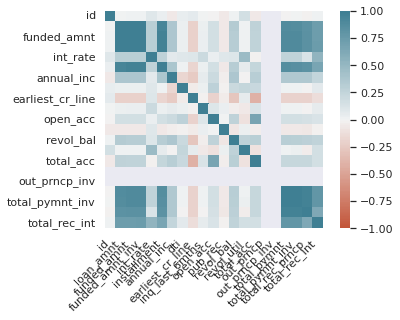

In [ ]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [ ]:
corr_ = corr[corr>.5]
corr_

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,1.000000,0.991077,0.988562,NaN,0.945227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.876649,0.873982,0.821542,0.729605
funded_amnt,NaN,0.991077,1.000000,0.997680,NaN,0.959753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885817,0.883351,0.831536,0.733411
funded_amnt_inv,NaN,0.988562,0.997680,1.000000,NaN,0.959195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884368,0.885395,0.829373,0.734486
int_rate,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.531955
installment,NaN,0.945227,0.959753,0.959195,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.859719,0.859358,0.827792,0.660184
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
earliest_cr_line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# actual value
corr_score = df[num_col].corr()
corr_score

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
id,1.000000,0.004178,0.011103,0.017539,0.086868,0.033664,-0.062071,0.044517,0.067164,0.003698,-0.006402,-0.055415,0.011139,0.162849,-0.047536,NaN,NaN,-0.003022,0.003878,-0.011804,0.016361
loan_amnt,0.004178,1.000000,0.991077,0.988562,0.308443,0.945227,0.374833,0.026780,-0.208462,0.031099,0.165942,-0.057050,0.329235,0.020233,0.266225,NaN,NaN,0.876649,0.873982,0.821542,0.729605
funded_amnt,0.011103,0.991077,1.000000,0.997680,0.303362,0.959753,0.373535,0.025584,-0.204689,0.034388,0.166063,-0.058249,0.327480,0.021073,0.263555,NaN,NaN,0.885817,0.883351,0.831536,0.733411
funded_amnt_inv,0.017539,0.988562,0.997680,1.000000,0.302945,0.959195,0.371554,0.025192,-0.204024,0.036248,0.165525,-0.057969,0.325388,0.022395,0.261671,NaN,NaN,0.884368,0.885395,0.829373,0.734486
int_rate,0.086868,0.308443,0.303362,0.302945,1.000000,0.267857,0.076103,0.091614,0.106189,0.199540,0.038537,0.098385,0.102212,0.470893,-0.014897,NaN,NaN,0.259296,0.258493,0.124425,0.531955
installment,0.033664,0.945227,0.959753,0.959195,0.267857,1.000000,0.385192,0.017451,-0.181788,0.030727,0.163820,-0.052710,0.325749,0.056484,0.243247,NaN,NaN,0.859719,0.859358,0.827792,0.660184
annual_inc,-0.062071,0.374833,0.373535,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.245650,0.048186,0.202596,-0.025920,0.369286,-0.005319,0.319062,NaN,NaN,0.366455,0.364869,0.365577,0.253143
dti,0.044517,0.026780,0.025584,0.025192,0.091614,0.017451,-0.176920,1.000000,-0.046850,0.025207,0.285946,-0.016486,0.213272,0.243479,0.224204,NaN,NaN,0.020130,0.019860,-0.004552,0.077365
earliest_cr_line,0.067164,-0.208462,-0.204689,-0.204024,0.106189,-0.181788,-0.245650,-0.046850,1.000000,-0.010438,-0.200414,-0.046757,-0.278942,0.053807,-0.400211,NaN,NaN,-0.189616,-0.189084,-0.190829,-0.120073
inq_last_6mths,0.003698,0.031099,0.034388,0.036248,0.199540,0.030727,0.048186,0.025207,-0.010438,1.000000,0.107466,0.033540,-0.027261,-0.058507,0.125891,NaN,NaN,0.011611,0.013620,-0.006609,0.054989


In [ ]:
cat_col = ['']

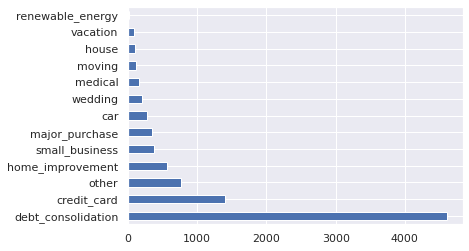

In [ ]:
# 'purpose' category
df['purpose'].value_counts().plot(kind = 'barh')

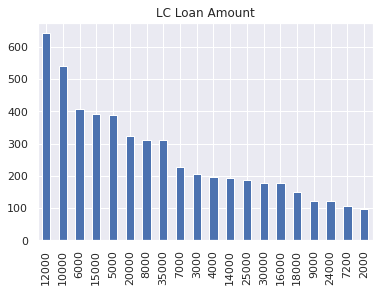

In [ ]:
# 'loan_amnt' category
df['loan_amnt'].value_counts()[:20].plot(kind='bar', title='LC Loan Amount')

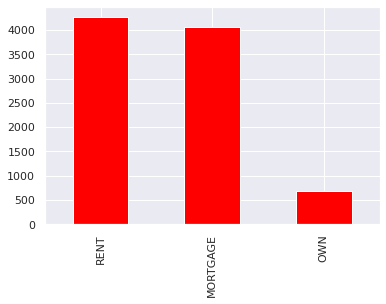

In [ ]:
# home_ownership category
df['home_ownership'].value_counts().plot(kind='bar', color='red')

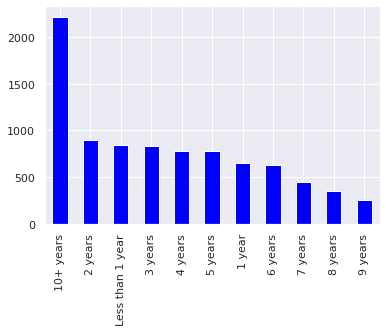

In [ ]:
# empolyment length category
df['emp_length'].value_counts().plot(kind='bar', color='blue')

In [ ]:
# total loan amount issued by State
df_location = df.groupby('addr_state').sum().reset_index()
df_location = df_location.filter(['addr_state', 'loan_amnt'], axis=1)
df_location.head()

,addr_state,loan_amnt
0,AK,359675
1,AL,1308425
2,AR,753275
3,AZ,2477200
4,CA,20470425


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'],
    z=df_location['loan_amnt'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='USD'
))
fig.update_layout(
    title_text='Total amount issued by State',
    geo_scope='usa'
)
fig.show()

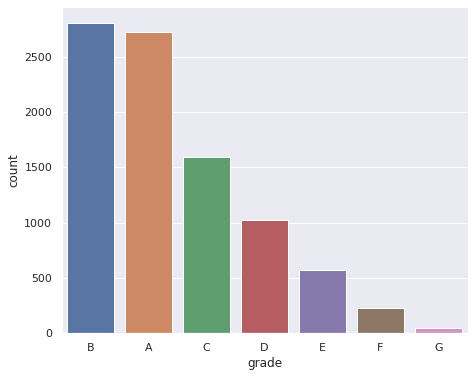

In [ ]:
# grade distribution plot
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='grade', data=df, order=df['grade'].value_counts().index)

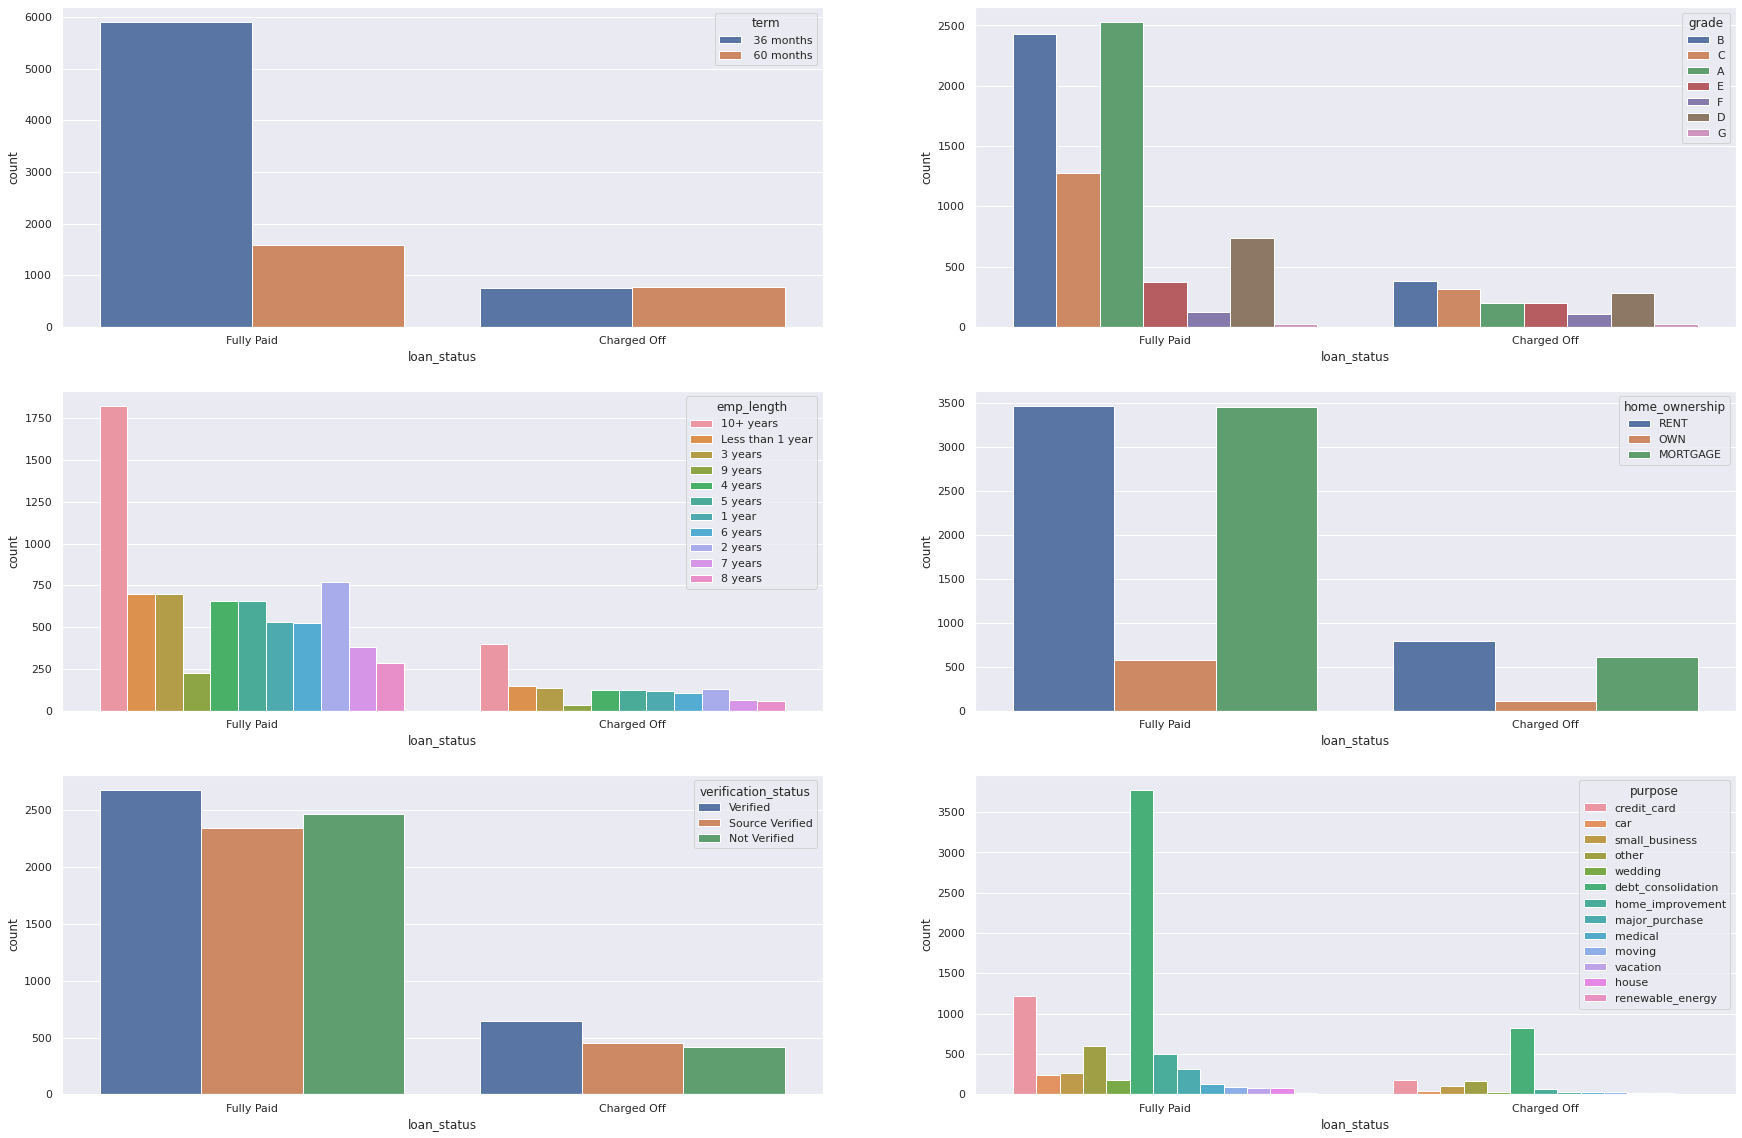

In [ ]:
# understand categorical feature
_,axss = plt.subplots(3,2, figsize=[30,20])
sns.countplot(x='loan_status', hue='term', data=df, ax=axss[0][0])
sns.countplot(x='loan_status', hue='grade', data=df, ax=axss[0][1])
sns.countplot(x='loan_status', hue='emp_length', data=df, ax=axss[1][0])
sns.countplot(x='loan_status', hue='home_ownership', data=df, ax=axss[1][1])
sns.countplot(x='loan_status', hue='verification_status', data=df, ax=axss[2][0])
sns.countplot(x='loan_status', hue='purpose', data=df, ax=axss[2][1])

In [ ]:
# correlation between categorical variables
df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
cat_col = list(df_cat['index'].loc[df_cat['a'] == 'object'])
df_cat = df[cat_col[:-1]]
df_cat.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,addr_state
0,36 months,B,10+ years,RENT,Verified,credit_card,AZ
1,60 months,C,Less than 1 year,RENT,Source Verified,car,GA
2,36 months,C,10+ years,RENT,Not Verified,small_business,IL
3,36 months,C,10+ years,RENT,Source Verified,other,CA
4,36 months,A,3 years,RENT,Source Verified,wedding,AZ


In [ ]:
df_cat = df_cat.dropna()

In [ ]:
from itertools import product
cat_col1 = ('term','grade','emp_length','home_ownership','verification_status','purpose','addr_state')
cat_col2 = ('term','grade','emp_length','home_ownership','verification_status','purpose','addr_state')
cat_col_prod = list(product(cat_col1, cat_col2, repeat=1))

In [ ]:
# correlation bwtween categorical variables
# chi-square test
import scipy.stats as ss
corr_cat=[]
for i in cat_col_prod:
  if i[0] != i[1]:
    corr_cat.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))
chi_test_output = pd.DataFrame(corr_cat, columns=['col1','col2','coef'])
chi_test_output.pivot(index='col1',columns='col2',values='coef')

col2,addr_state,emp_length,grade,home_ownership,purpose,term,verification_status
col1,,,,,,,
addr_state,NaN,1.568230e-01,3.939444e-01,1.057379e-107,1.480526e-01,5.591099e-03,4.602259e-03
emp_length,1.568230e-01,NaN,2.858962e-01,4.093220e-103,2.236972e-07,3.751983e-15,2.048616e-72
grade,3.939444e-01,2.858962e-01,NaN,1.415462e-16,1.074344e-22,0.000000e+00,1.605059e-106
home_ownership,1.057379e-107,4.093220e-103,1.415462e-16,NaN,4.048058e-91,4.093641e-19,1.277871e-29
purpose,1.480526e-01,2.236972e-07,1.074344e-22,4.048058e-91,NaN,2.219538e-39,1.764420e-38
term,5.591099e-03,3.751983e-15,0.000000e+00,4.093641e-19,2.219538e-39,NaN,4.503737e-178
verification_status,4.602259e-03,2.048616e-72,1.605059e-106,1.277871e-29,1.764420e-38,4.503737e-178,NaN


In [ ]:
# check Cramer's V between categorical variables
cramers_stat = []
for i in cat_col_prod:
  if i[0] != i[1]:
    matrix = pd.crosstab(df_cat[i[0]], df_cat[i[1]])
    chi2 = ss.chi2_contingency(matrix)[0]
    n = sum(matrix.sum())
    phi2 = chi2/n
    r, k = matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1) 
    cramers = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))           
    cramers_stat.append((i[0],i[1],cramers))
cramers_output = pd.DataFrame(cramers_stat, columns=['col1','col2','coef'])
cramers_output.pivot(index='col1',columns='col2',values='coef')


col2,addr_state,emp_length,grade,home_ownership,purpose,term,verification_status
col1,,,,,,,
addr_state,NaN,0.018539,0.010299,0.196789,0.018053,0.056147,0.047005
emp_length,0.018539,NaN,0.010457,0.174169,0.033102,0.096430,0.147898
grade,0.010299,0.010457,NaN,0.072388,0.059690,0.545550,0.173266
home_ownership,0.196789,0.174169,0.072388,NaN,0.166044,0.097558,0.089001
purpose,0.018053,0.033102,0.059690,0.166044,NaN,0.152985,0.112739
term,0.056147,0.096430,0.545550,0.097558,0.152985,NaN,0.306243
verification_status,0.047005,0.147898,0.173266,0.089001,0.112739,0.306243,NaN


# Part 2: Data Cleaning and Feature Preprocessing

# 2.1 Data Description

In [ ]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,Source Verified,car,GA,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [ ]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9001.000000,9004.000000,9004.0,9004.0,9004.000000,9004.000000,9004.000000,9004.000000
mean,9.632337e+05,12291.884163,12154.156486,12076.054639,12.126728,357.478229,6.957693e+04,13.889958,37300.462794,0.857175,9.429809,0.047423,13658.416148,52.368789,22.438583,0.0,0.0,13037.547635,12943.841207,10563.492623,2328.716827
std,7.953238e+04,8285.682170,8096.937145,8033.211335,4.195740,227.180439,4.885841e+04,6.609968,4379.652217,1.043980,4.263802,0.215667,15038.825421,27.644807,11.146531,0.0,0.0,9838.298075,9743.909609,7946.456673,2650.982007
min,4.581650e+05,1000.000000,1000.000000,750.000000,5.420000,30.160000,6.000000e+03,0.000000,19998.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.778840e+05,6000.000000,6000.000000,6000.000000,8.490000,187.750000,4.200000e+04,8.860000,34455.000000,0.000000,6.000000,0.000000,4559.750000,30.500000,14.000000,0.0,0.0,5802.197477,5779.940000,4800.000000,682.042500
50%,9.879685e+05,10000.000000,10000.000000,10000.000000,11.710000,312.910000,6.000000e+04,13.940000,36161.000000,1.000000,9.000000,0.000000,9889.000000,54.700000,21.000000,0.0,0.0,10623.210000,10577.545000,8650.000000,1367.130000
75%,1.033607e+06,16000.000000,16000.000000,15975.000000,15.230000,469.360000,8.300000e+04,19.082500,42827.000000,1.000000,12.000000,0.000000,17468.250000,75.000000,29.000000,0.0,0.0,17354.405075,17225.490000,14500.000000,2881.767500
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.110000,1288.100000,1.782000e+06,29.920000,43076.000000,8.000000,34.000000,2.000000,148804.000000,99.900000,79.000000,0.0,0.0,56809.051630,56475.050000,35000.010000,21809.050000


# 2.2 Data Cleaning

In [ ]:
# Category features mapping
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['term']))}
df['term'] = df['term'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['grade']))}
df['grade'] = df['grade'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['home_ownership']))}
df['home_ownership']=df['home_ownership'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['verification_status']))}
df['verification_status']=df['verification_status'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['purpose']))}
df['purpose']=df['purpose'].map(class_mapping)
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['addr_state']))}
df['addr_state']=df['addr_state'].map(class_mapping)

class_mapping = {'Fully Paid' : 0, 'Charged Off' : 1}
df['loan_status']=df['loan_status'].map(class_mapping)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,0,10.65,162.87,1,10+ years,2,24000.0,2,1,3,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,0
1,1077430,2500,2500,2500.0,1,15.27,59.83,2,Less than 1 year,2,30000.0,1,0,10,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,1
2,1077175,2400,2400,2400.0,0,15.96,84.33,2,10+ years,2,12252.0,0,10,12,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,0
3,1076863,10000,10000,10000.0,0,13.49,339.31,2,10+ years,2,49200.0,1,8,4,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,0
4,1075269,5000,5000,5000.0,0,7.90,156.46,0,3 years,2,36000.0,1,12,3,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,0


In [ ]:
# deal with missing value
df = df.select_dtypes(include=[np.number]).interpolate().dropna()
df.isnull().sum()

id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
loan_status            0
dtype: int64

In [ ]:
# drop high correlation numerical columns
df = df.drop(['funded_amnt'], axis=1)
df = df.drop(['funded_amnt_inv'], axis=1)
df = df.drop(['total_pymnt'], axis=1)
df = df.drop(['total_pymnt_inv'], axis=1)
df = df.drop(['total_rec_int'], axis=1)
df = df.drop(['id'], axis=1)
df = df.drop(['total_rec_prncp'], axis=1)
df = df.drop(['out_prncp'], axis=1)
df = df.drop(['out_prncp_inv'], axis=1)
df = df.drop(['installment'], axis=1)

df.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000,0,10.65,1,2,24000.0,2,1,3,27.65,31048,1,3,0,13648,83.7,9,0
1,2500,1,15.27,2,2,30000.0,1,0,10,1.00,36251,5,3,0,1687,9.4,4,1
2,2400,0,15.96,2,2,12252.0,0,10,12,8.72,43040,2,2,0,2956,98.5,10,0
3,10000,0,13.49,2,2,49200.0,1,8,4,20.00,35096,1,10,0,5598,21.0,37,0
4,5000,0,7.90,0,2,36000.0,1,12,3,11.20,43043,3,9,0,7963,28.3,12,0


# 2.3 Data Split

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split

yPredict = df.loan_status
XClean = df.drop(['loan_status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=0.25)

In [ ]:
X_train.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
7442,14400,1,19.29,4,1,150000.0,1,7,28,4.88,43009,1,8,0,3859,52.8,26
8145,7000,0,5.42,0,1,45000.0,1,2,4,7.36,42738,0,8,0,11237,68.9,16
1434,1325,0,6.62,0,1,39456.0,0,8,4,26.22,36557,1,9,0,10791,43.8,29
2777,12000,0,6.62,0,2,60000.0,0,2,4,8.86,36161,1,9,0,10170,23.8,29
1867,16000,1,15.27,2,0,45200.0,2,2,4,19.67,33482,3,7,0,14750,58.5,17


In [ ]:
y_train.head()

7442    0
8145    0
1434    0
2777    1
1867    0
Name: loan_status, dtype: int64

# 2.4 Data Preprocessing

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Part 3: Model Training and Selection

# 3.1 RandomForest/KNN/LogisticRegression

# 3.1.1 Build Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [ ]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
prediction_Regression = classifier_logistic.predict(X_test)
print(classification_report(y_test, prediction_Regression))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.64      0.06      0.10       379

    accuracy                           0.84      2251
   macro avg       0.74      0.52      0.51      2251
weighted avg       0.80      0.84      0.77      2251



In [ ]:
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction_KNN = classifier_KNN.predict(X_test)
print(classification_report(y_test, prediction_KNN))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1872
           1       0.40      0.15      0.22       379

    accuracy                           0.82      2251
   macro avg       0.62      0.55      0.56      2251
weighted avg       0.77      0.82      0.78      2251



In [ ]:
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
prediction_RF = classifier_RF.predict(X_test)
print(classification_report(y_test, prediction_RF))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.59      0.06      0.11       379

    accuracy                           0.83      2251
   macro avg       0.71      0.53      0.51      2251
weighted avg       0.80      0.83      0.77      2251



# 3.1.2 Cross Validation

In [ ]:
# Use 5-fold Cross Validation to get the accuracy for different models
from sklearn import model_selection

model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
  cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
  print(cv_score)
  print('Model accuracy of' + model_names[count] + ' is ' + str(cv_score.mean()))
  count += 1

[0.83493708 0.83419689 0.83567728 0.82814815 0.83777778]
Model accuracy ofLogistic Regression is 0.8341474353702333
[0.81199112 0.81273131 0.80903035 0.80296296 0.81037037]
Model accuracy ofKNN is 0.8094172218110043
[0.83789785 0.82679497 0.82975574 0.82888889 0.83481481]
Model accuracy ofRandom Forest is 0.8316304520656852


Logistic Regression has the best performance in these three models.

# 3.2 Other models - SVM

In [ ]:
from sklearn.svm import SVC

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))

Model accuracy of SVM is: 0.832222935000137


# 3.3 Other models - Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (30,30,30))
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [ ]:
prediction_mlp = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction_mlp))

[[1674  198]
 [ 283   96]]


In [ ]:
print(classification_report(y_test, prediction_mlp))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1872
           1       0.33      0.25      0.29       379

    accuracy                           0.79      2251
   macro avg       0.59      0.57      0.58      2251
weighted avg       0.77      0.79      0.78      2251



Logistic Regression has the best performance in all above models.

# 3.4 Use Grid Search to Find Optimal Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
# C is the 1/lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)
print_grid_search_metrics(Grid_LR)

Best score: 0.834591770156537
Best parameters set:
C:0.05
penalty:l2


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_
best_LR_model.predict(X_test)
best_LR_model.score(X_test, y_test)

0.8351843625055531

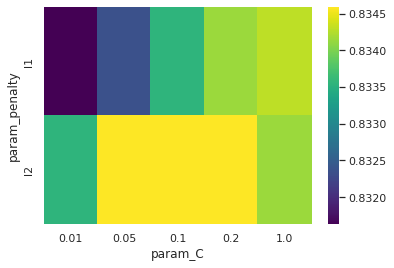

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

Logistic Regression with L2 and 1/lambda=0.2 has the better performance compared with the original one.

# Part 4: Feature Importance

In [ ]:
X_with_corr = XClean.copy()
y=yPredict.copy()
X_with_corr.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,0,10.65,1,2,24000.0,2,1,3,27.65,31048,1,3,0,13648,83.7,9
1,2500,1,15.27,2,2,30000.0,1,0,10,1.00,36251,5,3,0,1687,9.4,4
2,2400,0,15.96,2,2,12252.0,0,10,12,8.72,43040,2,2,0,2956,98.5,10
3,10000,0,13.49,2,2,49200.0,1,8,4,20.00,35096,1,10,0,5598,21.0,37
4,5000,0,7.90,0,2,36000.0,1,12,3,11.20,43043,3,9,0,7963,28.3,12


In [ ]:
# check fearure importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(XClean, yPredict)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

print('Feature importance ranking by Random Forest Model:')
for ind in range(XClean.shape[1]):
  print ("{0}: {1}".format(XClean.columns[indices[ind]], round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
revol_util: 0.0967
annual_inc: 0.0939
revol_bal: 0.0915
dti: 0.0907
earliest_cr_line: 0.0884
int_rate: 0.0856
loan_amnt: 0.0764
total_acc: 0.0717
addr_state: 0.0644
open_acc: 0.0561
purpose: 0.0408
term: 0.0385
grade: 0.0319
inq_last_6mths: 0.029
verification_status: 0.0211
home_ownership: 0.016
pub_rec: 0.0073


In [ ]:
# add L2 regularization to logistic regression
# check coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty='l2', C=0.2, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print('Logistic Regression (L2) Coefficients')
for ind in range(X_with_corr.shape[1]):
  print('{0}: {1}'.format(X_with_corr.columns[indices[ind]], round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
int_rate: 0.5193
annual_inc: -0.4882
term: 0.3992
purpose: 0.2029
revol_util: 0.1442
inq_last_6mths: 0.0986
loan_amnt: 0.0925
verification_status: -0.0783
home_ownership: 0.0757
grade: -0.0713
earliest_cr_line: -0.0635
addr_state: -0.0611
pub_rec: 0.0601
open_acc: 0.0585
total_acc: -0.0567
dti: 0.033
revol_bal: -0.0043


# Part 5: Summary

The accuracy of Logistic Regression (L2) Model with lambda=0.2 is 0.8352, higher than all the other models mentioned above, ddemonstrating that this analytical model provides a high degree of fit to the target dataset. However, it cannot rule out that other models would not have higher accuracy after tuning hyperparameters.

Based on the orders of feature importance provided by Random Forest and Logistic Regression, annual_inc, int_rate, purpose, loan_amnt and revol_util have a more significant impact on the loan status.

*   int_rate: Interest Rate on the loan
*   annual_inc: The annual income provided by the borrower during registration.
*   purpose: A category provided by the borrower for the loan request.
*   loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
*   revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


# Part 6: Future Improvement

*   Feature selection based on the order of feature importance and the facts of use case.
*   Correlation between numerical variables and categorical variables.
*   Hyperparameter tuning for models with slight difference in accuracy from the currently best one.

